#                              PHASE 2



In [1]:
#we have to import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading excel file 
df=pd.read_excel('phase 1 combined data.xlsx')
df

,State/UT,Year,population(total),Tot_Male,Tot_Female,Polulation_Literacy,Male_Literacy,Female_Litracy,Litracy_rate,Area (km2),...,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total Crimes,tot_crimes_sc,total crime against women,Total crimes against STs,Total crime against children,Crime Rate,Column15846
0,A& N ISLANDS,2001,356152,192972,163180,253135.0,146831.0,106304,81.30,8249,...,0,323,658,1386,0,34.0,1.0,0.0,184.752578,NaN
1,ANDHRA PRADESH,2001,76210007,38527413,37682594,39934323.0,23444788.0,16489535,60.47,275045,...,7400,34344,130089,278982,2933,13669.0,512.0,270.0,170.698055,NaN
2,ARUNACHAL PRADESH,2001,1097968,579941,518027,484785.0,303281.0,181504,54.34,83743,...,0,618,2342,5243,0,180.0,72.0,0.0,213.303120,NaN
3,ASSAM,2001,26655528,13777037,12878491,14015354.0,8188697.0,5826657,63.25,78438,...,2010,9315,36877,81418,6,4048.0,0.0,18.0,138.346537,NaN
4,BIHAR,2001,82998509,43243795,39754714,31109577.0,20644376.0,10465201,47.00,94163,...,2406,36667,88432,189612,1303,4489.0,83.0,83.0,106.546492,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,TAMIL NADU,2012,72867204,36680044,36477172,53274562.0,28573260.0,24701302,80.88,130058,...,15499,124176,200474,415626,1647,6381.0,27.0,1036.0,275.122399,NaN
416,TRIPURA,2012,3717661,1889371,1826534,2897340.0,1538903.0,1355550,80.89,10486,...,10,1742,6264,13461,76,1559.0,29.0,20.0,168.493039,NaN
417,UTTAR PRADESH,2012,202226609,107092522,96666476,118889202.0,70418482.0,48470720,67.98,240928,...,14406,68538,198093,444403,6202,23033.0,44.0,6033.0,97.955952,NaN
418,UTTARAKHAND,2012,10260421,5240528,5136562,7100774.0,3971891.0,3128883,79.22,53483,...,670,2118,8882,20122,33,1055.0,3.0,122.0,86.565649,NaN


In [3]:
#printing the columns
df.columns

Index(['State/UT', 'Year', 'population(total)', 'Tot_Male', 'Tot_Female',
       'Polulation_Literacy', 'Male_Literacy', 'Female_Litracy',
       'Litracy_rate', 'Area (km2)', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total Crimes', 'tot_crimes_sc', 'total crime

In [26]:
df.drop(columns='Column15846',axis=1,inplace=True)

# 2.1 Analysis of Literacy Rate vs Total Crimes.

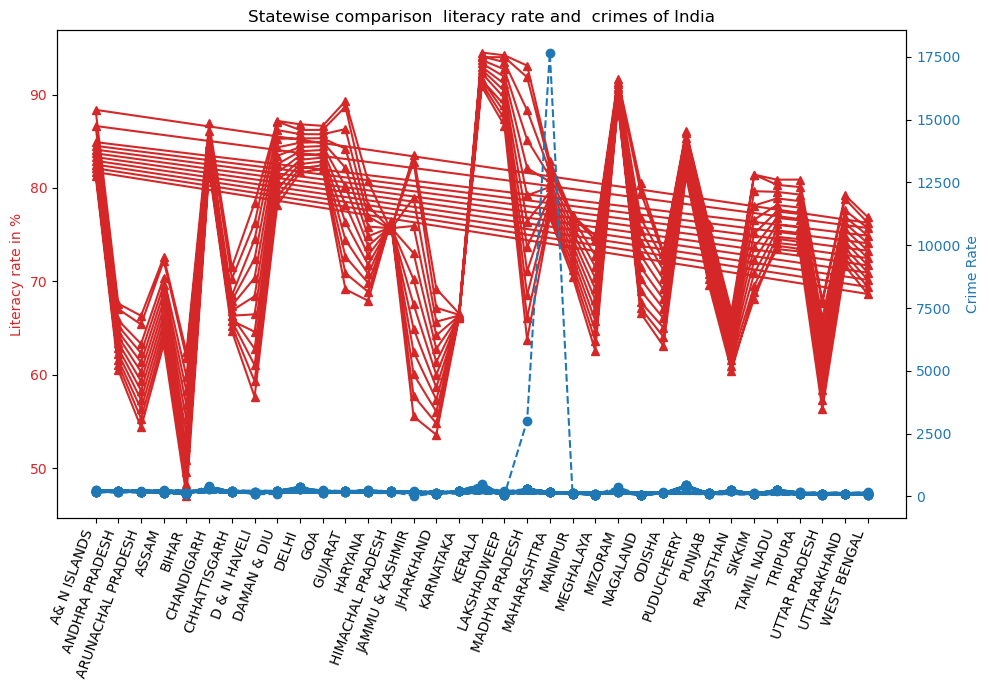

In [5]:
fig=plt.figure(figsize=(10,7))
x=list(df['State/UT'])
color = 'tab:red'
plt.plot(x,df['Litracy_rate'],color=color,marker='^',)
plt.gca().tick_params(axis='y', labelcolor=color)
plt.gca().set_ylabel('Literacy rate in %',color=color)
plt.xticks(rotation=70)
plt.gca().set_xticklabels(x, ha='right')
ax2 = plt.gca().twinx()
color = 'tab:blue'
plt.plot(x,df['Crime Rate'],color=color,marker='o',ls='--')
plt.gca().set_ylabel('Crime Rate',color=color)
plt.gca().tick_params(axis='y', labelcolor=color)
plt.gca().set_title('Statewise comparison  literacy rate and  crimes of India')
plt.tight_layout()
plt.show()

I  used plt.gca().twinx() to get multiple axes in the same figure. This was needed because literacy rate being in percentage and total crime rate being in decimals needed different scales.

Even though the analysis above considered literacy rate only which does not guarantee if any values are imbibed in the person which could prevent them from committing such crimes.I am in no way claiming that lack of education is the driving force for such people to commit these crimes, but as we observed above, it could be one of the reasons behind it too.

#   2.2 Analysis of the type of crime vs each state vs Literacy rate.

In [6]:
crimes=['MURDER','RAPE',
       'KIDNAPPING & ABDUCTION','DACOITY',
       'ROBBERY', 'BURGLARY', 'THEFT',
        'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING','ARSON','HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE']

df_state=pd.DataFrame()
for i in crimes:
    df_state_crimes=df.groupby(['State/UT'])[i].sum()
    df_state[i]=df_state_crimes
df_state["Total crimes"]=df_state.sum(axis=1)
df_state=df_state.sort_values(by="Total crimes",ascending=False)
df_state.reset_index()
df_state

,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,Total crimes
State/UT,,,,,,,,,,,,,,,,,,,
MAHARASHTRA,32767,17986,15101,8175,37719,185617,556807,90244,20766,79902,3806,14515,353760,4249,12110,80363,2,134613,1648502
ANDHRA PRADESH,31756,13479,21239,1987,7605,97336,287190,27459,12128,98843,3107,11968,546565,6215,36131,119007,17,138435,1460467
UTTAR PRADESH,65443,19058,59266,4809,30767,65587,312047,54110,38352,83960,3224,4554,139750,23824,26511,77617,3,113821,1122703
MADHYA PRADESH,28399,36087,11958,1655,22314,137346,263860,31124,6533,18495,424,10354,412577,9036,9317,39969,60,64969,1104477
RAJASTHAN,15844,15798,30727,563,9071,65268,232974,36073,9674,140800,726,8312,267353,5066,354,100101,6,78350,1017060
TAMIL NADU,20127,6952,15303,1237,11272,53339,185160,37368,3040,31689,2420,8149,280673,2317,10043,18188,15,140193,827485
BIHAR,41245,13124,37220,11099,23666,40293,153372,105096,15528,30690,826,8509,189266,13548,226,25680,440,44442,754270
KARNATAKA,19937,5174,10029,2581,17287,73298,199960,78421,5392,46335,1563,3711,251332,2918,831,30052,47,5078,753946
GUJARAT,13775,4249,15246,3842,14383,60689,213207,22192,16589,17066,2582,5647,135218,502,1365,59431,0,54385,640368


In [7]:
df_state.head(5)

,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,Total crimes
State/UT,,,,,,,,,,,,,,,,,,,
MAHARASHTRA,32767,17986,15101,8175,37719,185617,556807,90244,20766,79902,3806,14515,353760,4249,12110,80363,2,134613,1648502
ANDHRA PRADESH,31756,13479,21239,1987,7605,97336,287190,27459,12128,98843,3107,11968,546565,6215,36131,119007,17,138435,1460467
UTTAR PRADESH,65443,19058,59266,4809,30767,65587,312047,54110,38352,83960,3224,4554,139750,23824,26511,77617,3,113821,1122703
MADHYA PRADESH,28399,36087,11958,1655,22314,137346,263860,31124,6533,18495,424,10354,412577,9036,9317,39969,60,64969,1104477
RAJASTHAN,15844,15798,30727,563,9071,65268,232974,36073,9674,140800,726,8312,267353,5066,354,100101,6,78350,1017060


In [8]:
df_state.tail(5)

,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,BURGLARY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,Total crimes
State/UT,,,,,,,,,,,,,,,,,,,
SIKKIM,166,195,76,6,64,877,1019,257,54,350,19,80,939,2,14,44,0,422,4584
A& N ISLANDS,160,109,94,15,74,892,1124,140,72,253,11,98,1105,6,43,121,0,42,4359
D & N HAVELI,108,56,141,40,30,388,773,260,163,171,14,55,318,1,4,38,0,148,2708
DAMAN & DIU,104,58,131,39,31,392,760,258,159,175,14,54,310,1,4,41,0,163,2694
LAKSHADWEEP,3,7,1,3,0,36,113,153,2,0,1,22,57,0,0,7,0,0,405


In [9]:
df_up=df_state.loc[df_state.index=="UTTAR PRADESH"]
dfupT=df_up.T.drop("Total crimes")
D=dfupT[:5]

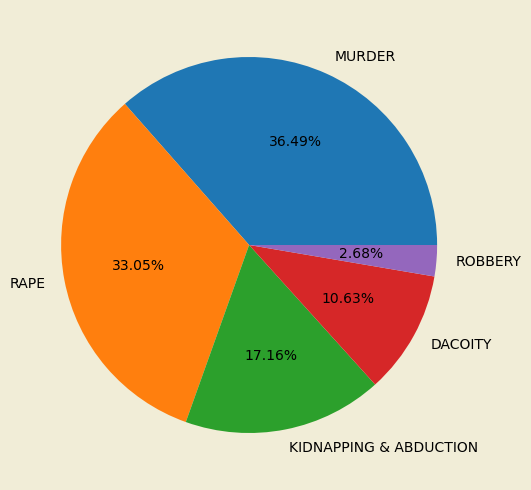

In [10]:
plt.figure(figsize=(20,5)).patch.set_facecolor("#F1EDD7FF")
plt.pie(D["UTTAR PRADESH"].sort_values(ascending=False),labels=D.index,autopct='%1.2f%%')
plt.tight_layout()

In [11]:
df_up=df_state.loc[df_state.index=="MAHARASHTRA"]
dfupT=df_up.T.drop("Total crimes")
D=dfupT[:5]

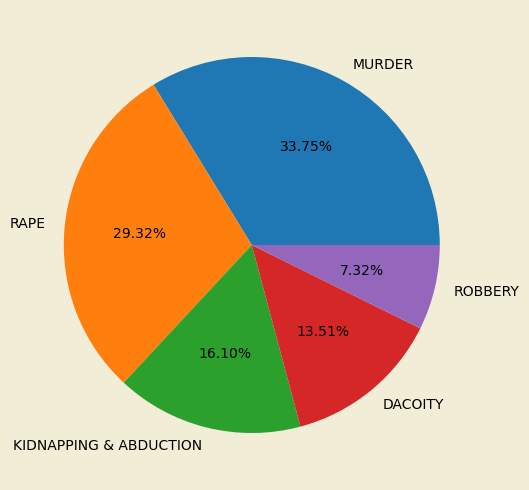

In [12]:
plt.figure(figsize=(20,5)).patch.set_facecolor("#F1EDD7FF")
plt.pie(D["MAHARASHTRA"].sort_values(ascending=False),labels=D.index,autopct='%1.2f%%')
plt.tight_layout()

State vs literacy rate

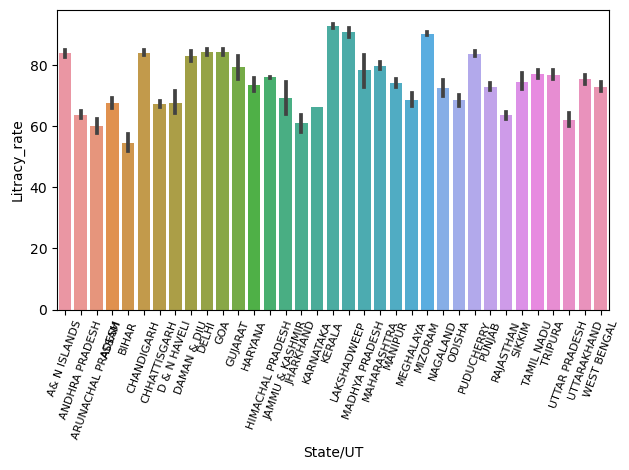

In [13]:
fig=plt.figure()
sns.barplot(x='State/UT',y='Litracy_rate',data=df)
plt.xticks(rotation=70,size=8)
plt.tight_layout()

Here from the following graphs we can clear that,

Kerala with the highest literacy rate does have medium  crime rate.
we can compare the states with each other since they have been converted into a uniform scale for comparing.
Whereas, there are states like Maharashtra where the crime rate  is very high with a relatively lower literacy rate.
The same with Andhra Pradesh, Arunachal Pradesh and Bihar too.so the  states and its crime rate vs literacy all are inter related with each other



# 2.3	Analysis of year-on-year total crime rate.



<AxesSubplot:xlabel='Year'>

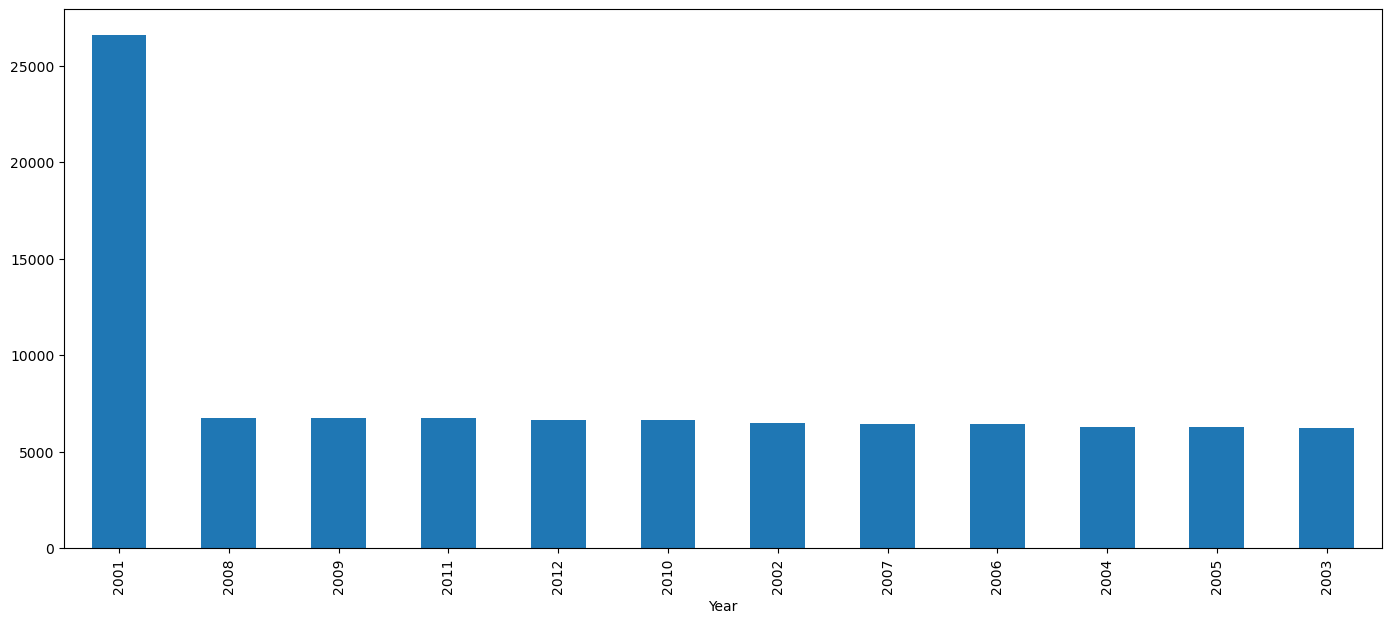

In [14]:
plt.figure(figsize=(17,7))
df.groupby("Year")["Crime Rate"].sum().sort_values(ascending=False).plot.bar()

Higher crime rate in year 2001 compared to other years which are going straight away without increasing the amount of crime rate  

# 2.4	 Analysis of area vs overall crime

<AxesSubplot:xlabel='State/UT,Area (km2)'>

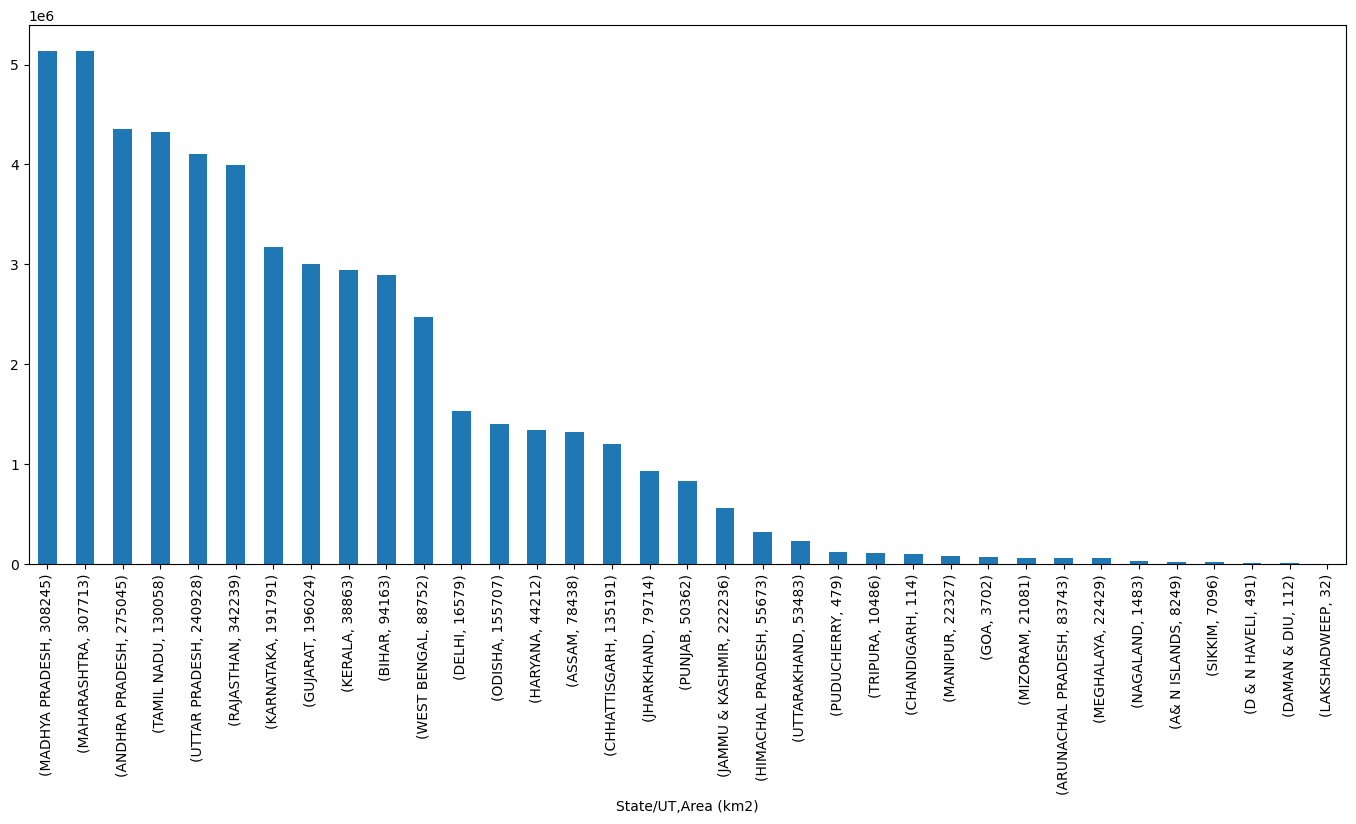

In [15]:
plt.figure(figsize=(17,7))
df.groupby(["State/UT","Area (km2)"])["Total Crimes"].sum().sort_values(ascending=False).plot.bar()

# 2.5	 Analysis of Population vs overall Crime

In [16]:
s=df[:10]

In [17]:
s.groupby('State/UT')["population(total)"].sum()

State/UT
A& N ISLANDS           356152
ANDHRA PRADESH       76210007
ARUNACHAL PRADESH     1097968
ASSAM                26655528
BIHAR                82998509
CHANDIGARH             900635
CHHATTISGARH         20833803
D & N HAVELI           220490
DAMAN & DIU            158204
DELHI                13850507
Name: population(total), dtype: int64

<AxesSubplot:xlabel='State/UT,population(total)'>

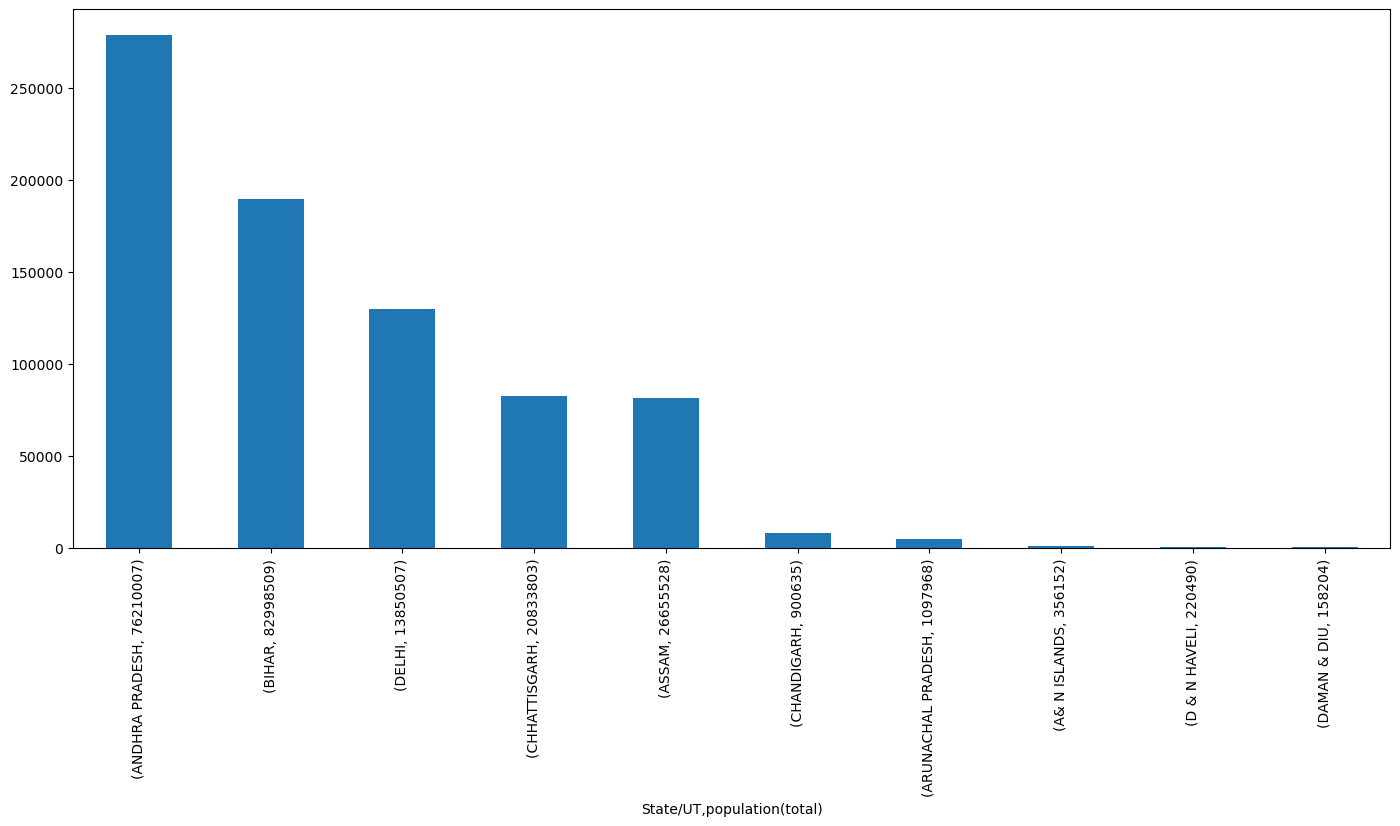

In [18]:
plt.figure(figsize=(17,7))
s.groupby(['State/UT',"population(total)"])["Total Crimes"].sum().sort_values(ascending=False).plot.bar()

# 2.6	Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.

# 1.UTTARPRADESH

In [19]:
df_up=df_state.loc[df_state.index=="UTTAR PRADESH"]
dfupT=df_up.T.drop("Total crimes")
dfupT

State/UT,UTTAR PRADESH
MURDER,65443
RAPE,19058
KIDNAPPING & ABDUCTION,59266
DACOITY,4809
ROBBERY,30767
BURGLARY,65587
THEFT,312047
RIOTS,54110
CRIMINAL BREACH OF TRUST,38352
CHEATING,83960


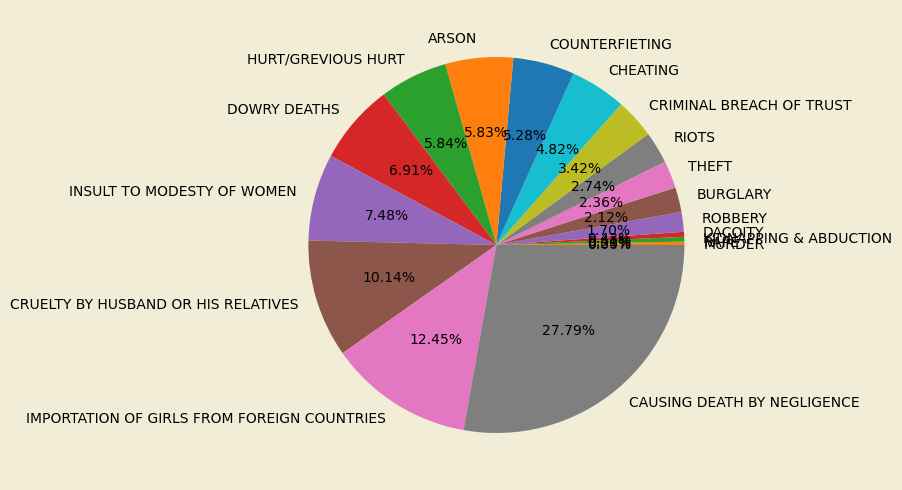

In [20]:
plt.figure(figsize=(10,5)).patch.set_facecolor("#F1EDD7FF")
plt.pie(dfupT["UTTAR PRADESH"].sort_values(),labels=dfupT.index,autopct='%1.2f%%')
plt.tight_layout()

Uttar Pradesh records the highest number of cases of Murders



# 2.MAHARASHTRA

In [21]:
df_up=df_state.loc[df_state.index=="MAHARASHTRA"]
dfupT=df_up.T.drop("Total crimes")
dfupT

State/UT,MAHARASHTRA
MURDER,32767
RAPE,17986
KIDNAPPING & ABDUCTION,15101
DACOITY,8175
ROBBERY,37719
BURGLARY,185617
THEFT,556807
RIOTS,90244
CRIMINAL BREACH OF TRUST,20766
CHEATING,79902


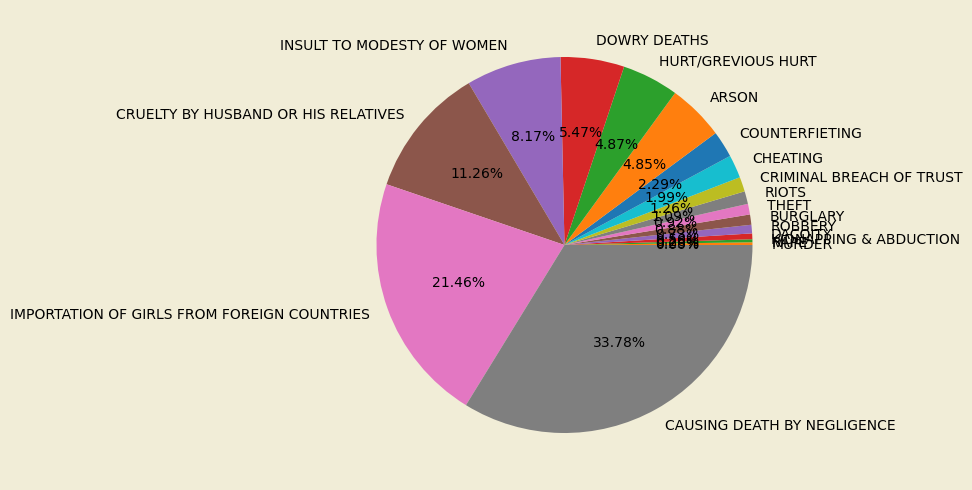

In [22]:
plt.figure(figsize=(20,5)).patch.set_facecolor("#F1EDD7FF")
plt.pie(dfupT["MAHARASHTRA"].sort_values(),labels=dfupT.index,autopct='%1.2f%%')
plt.tight_layout()

Maharashtra records the highest number of cases of CAUSING DEATH BY NEGLIGENCE.

# 3.MADHYAPRADESH

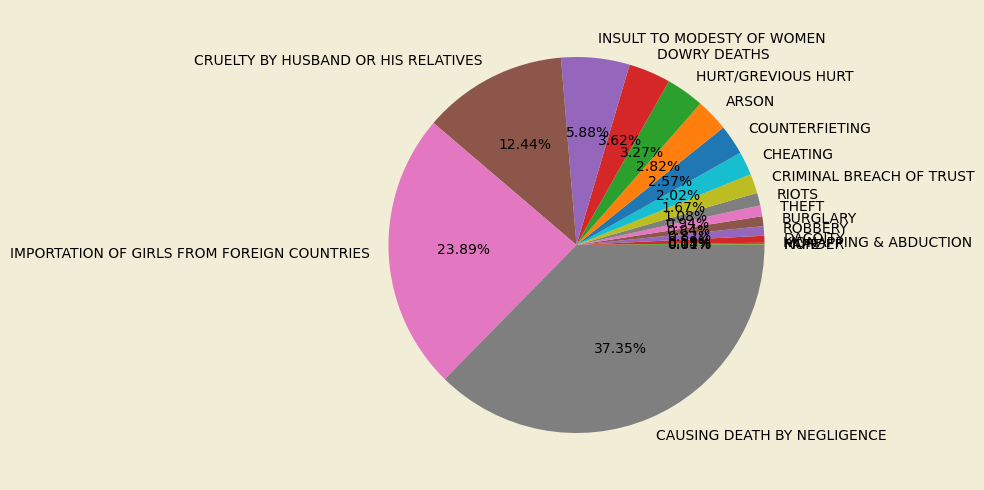

In [23]:
df_up=df_state.loc[df_state.index=="MADHYA PRADESH"]
dfupT=df_up.T.drop("Total crimes")
dfupT

plt.figure(figsize=(20,5)).patch.set_facecolor("#F1EDD7FF")
plt.pie(dfupT["MADHYA PRADESH"].sort_values(),labels=dfupT.index,autopct='%1.2f%%')
plt.tight_layout()

.MADHYAPRADESH  records the highest number of cases of CAUSING DEATH BY NEGLIGENCE.

# 4.RAJASHTHAN

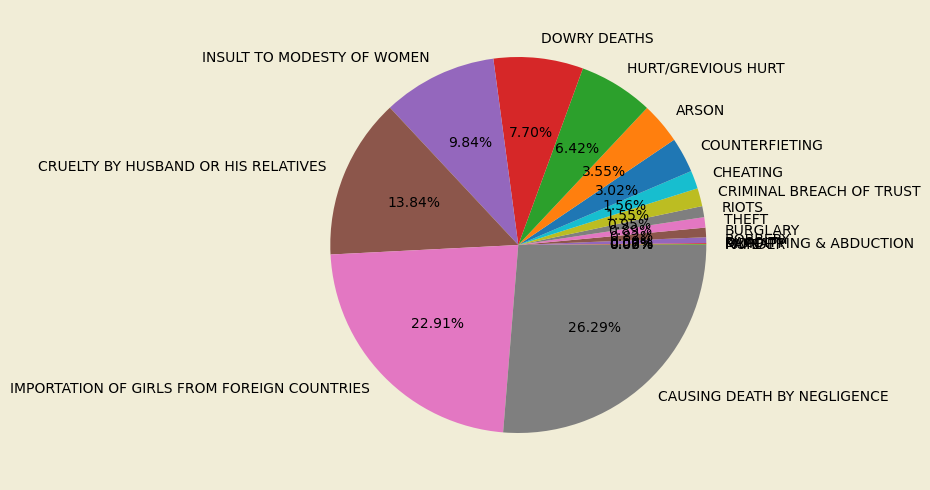

In [24]:
df_up=df_state.loc[df_state.index=="RAJASTHAN"]
dfupT=df_up.T.drop("Total crimes")
dfupT

plt.figure(figsize=(20,5)).patch.set_facecolor("#F1EDD7FF")
plt.pie(dfupT["RAJASTHAN"].sort_values(),labels=dfupT.index,autopct='%1.2f%%')
plt.tight_layout()

ANALYSIS VIA BAR PLOT

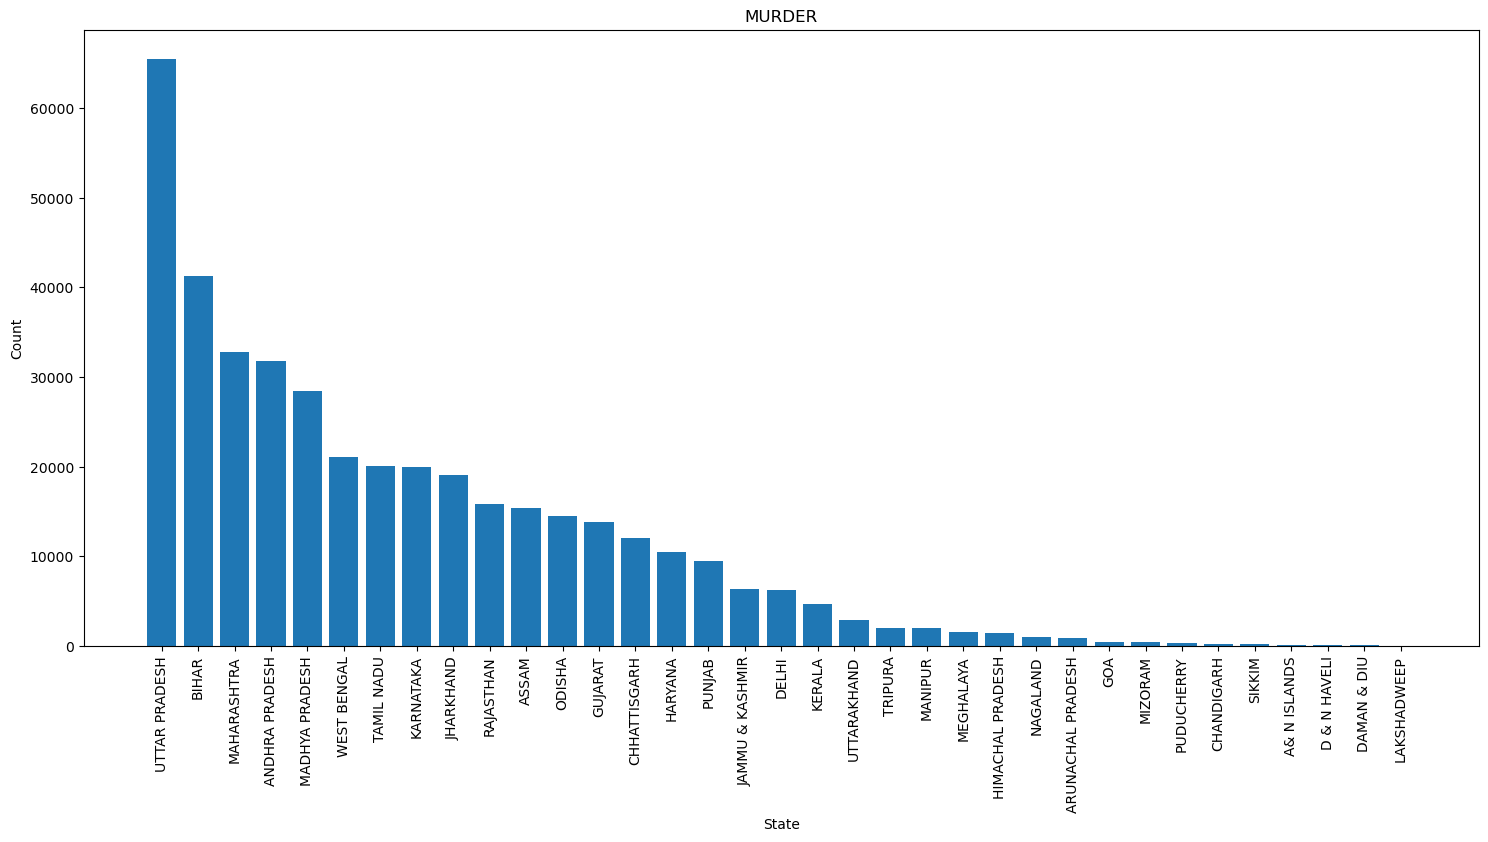

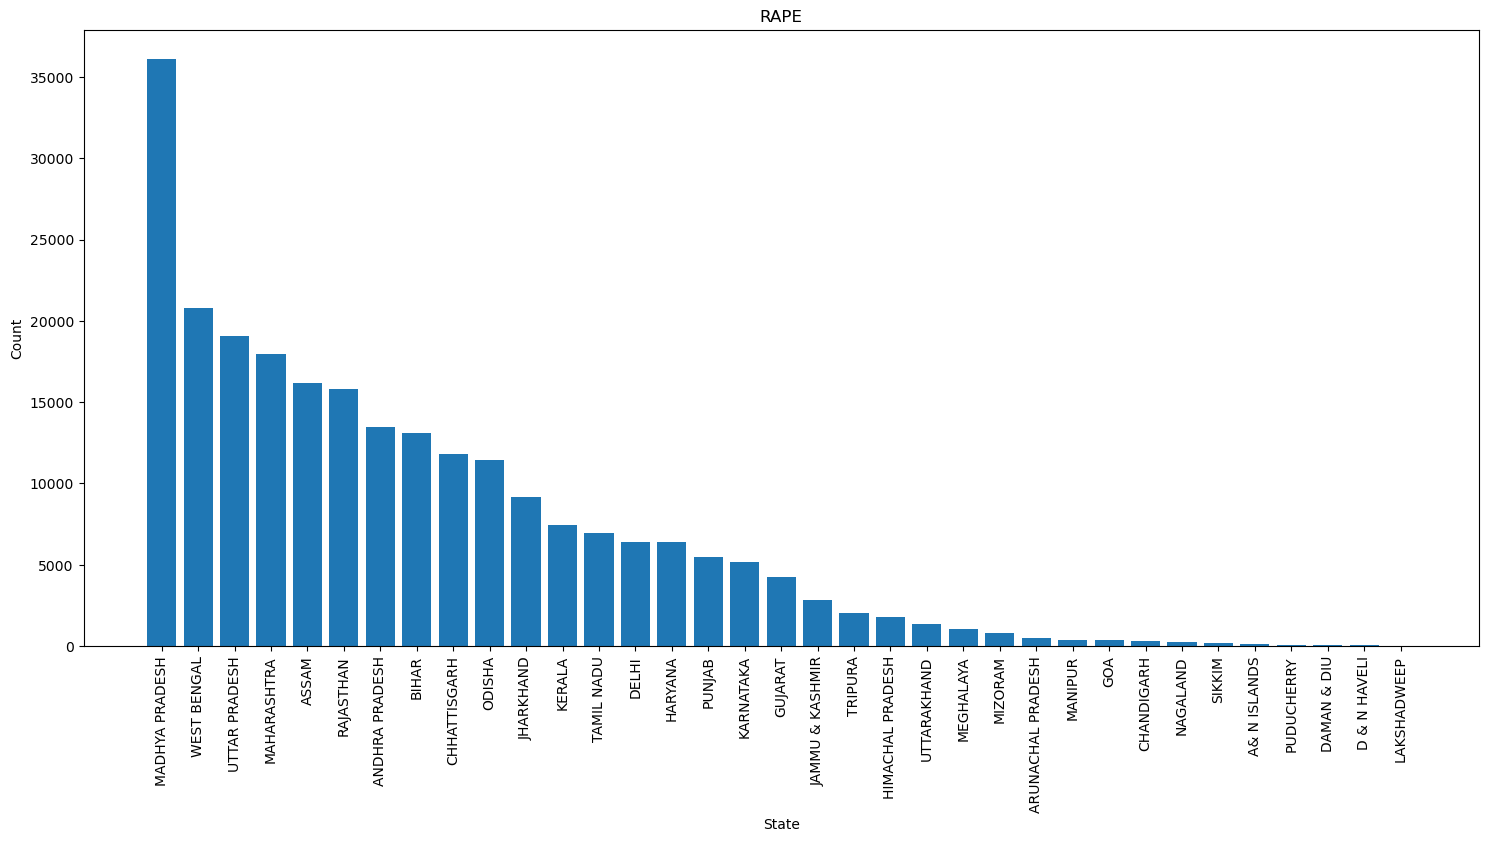

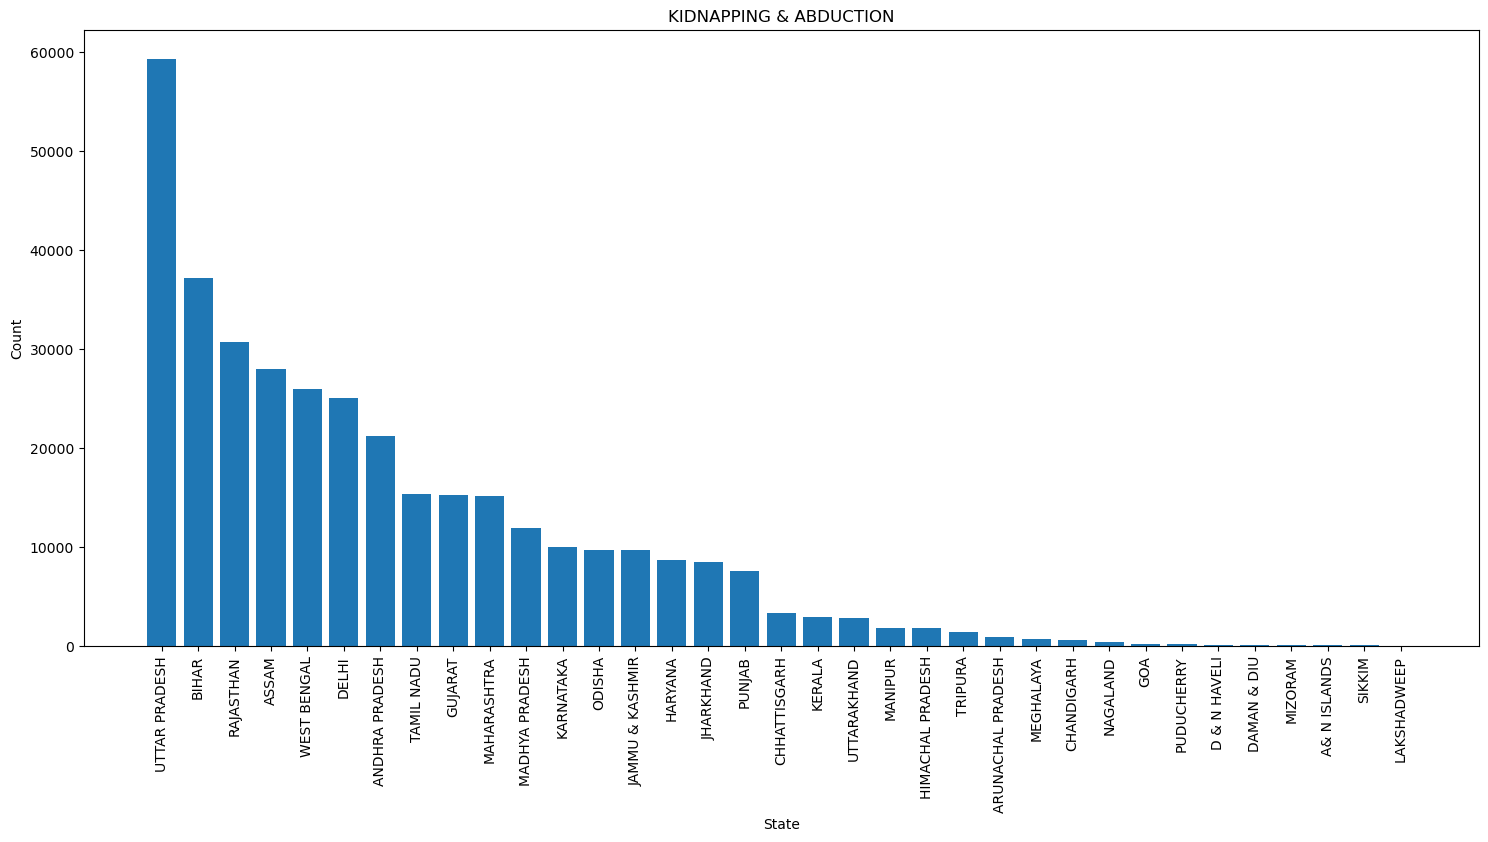

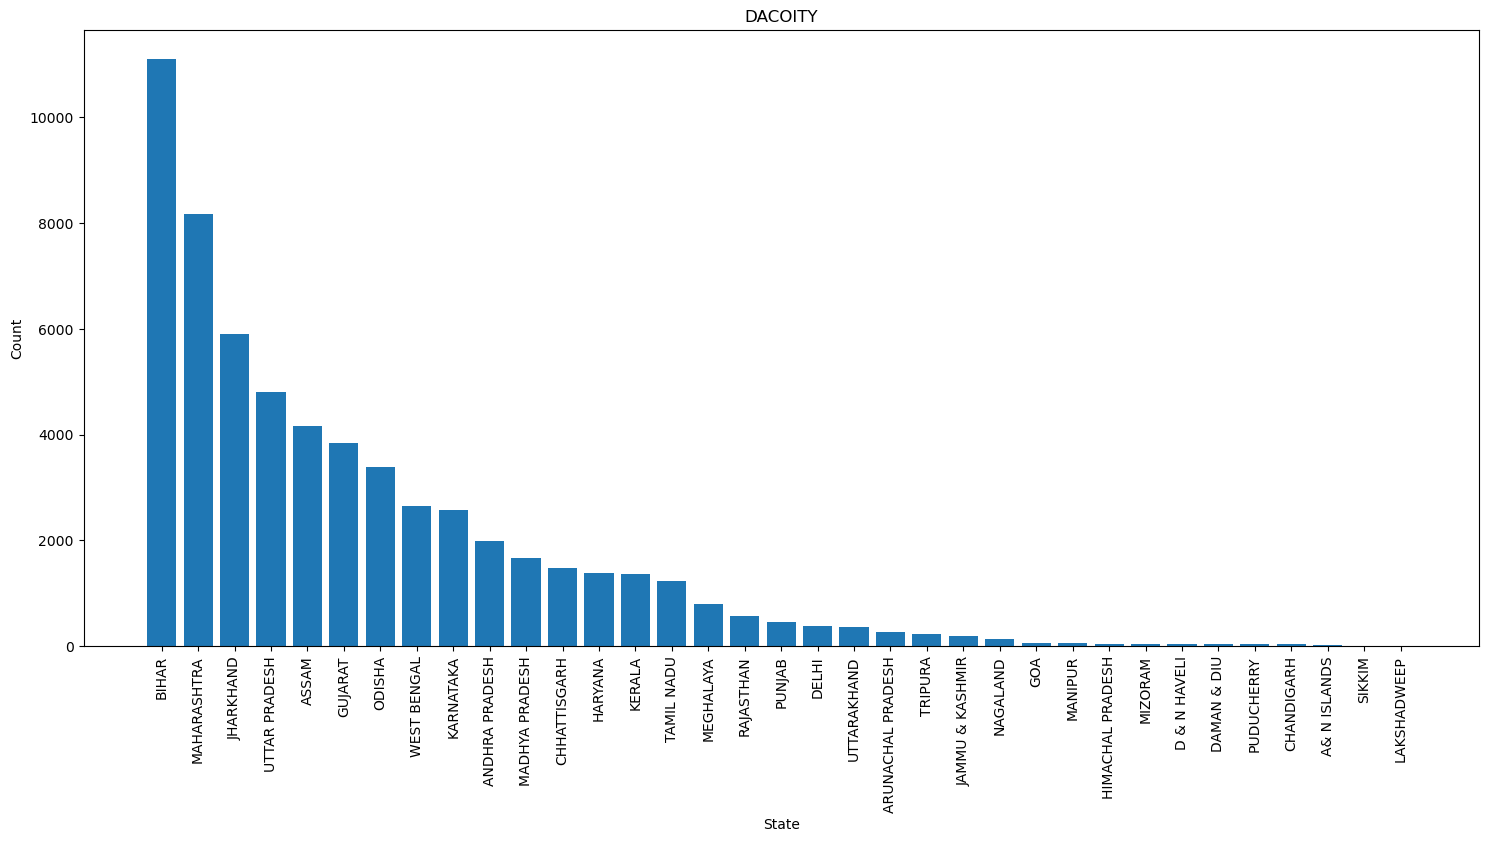

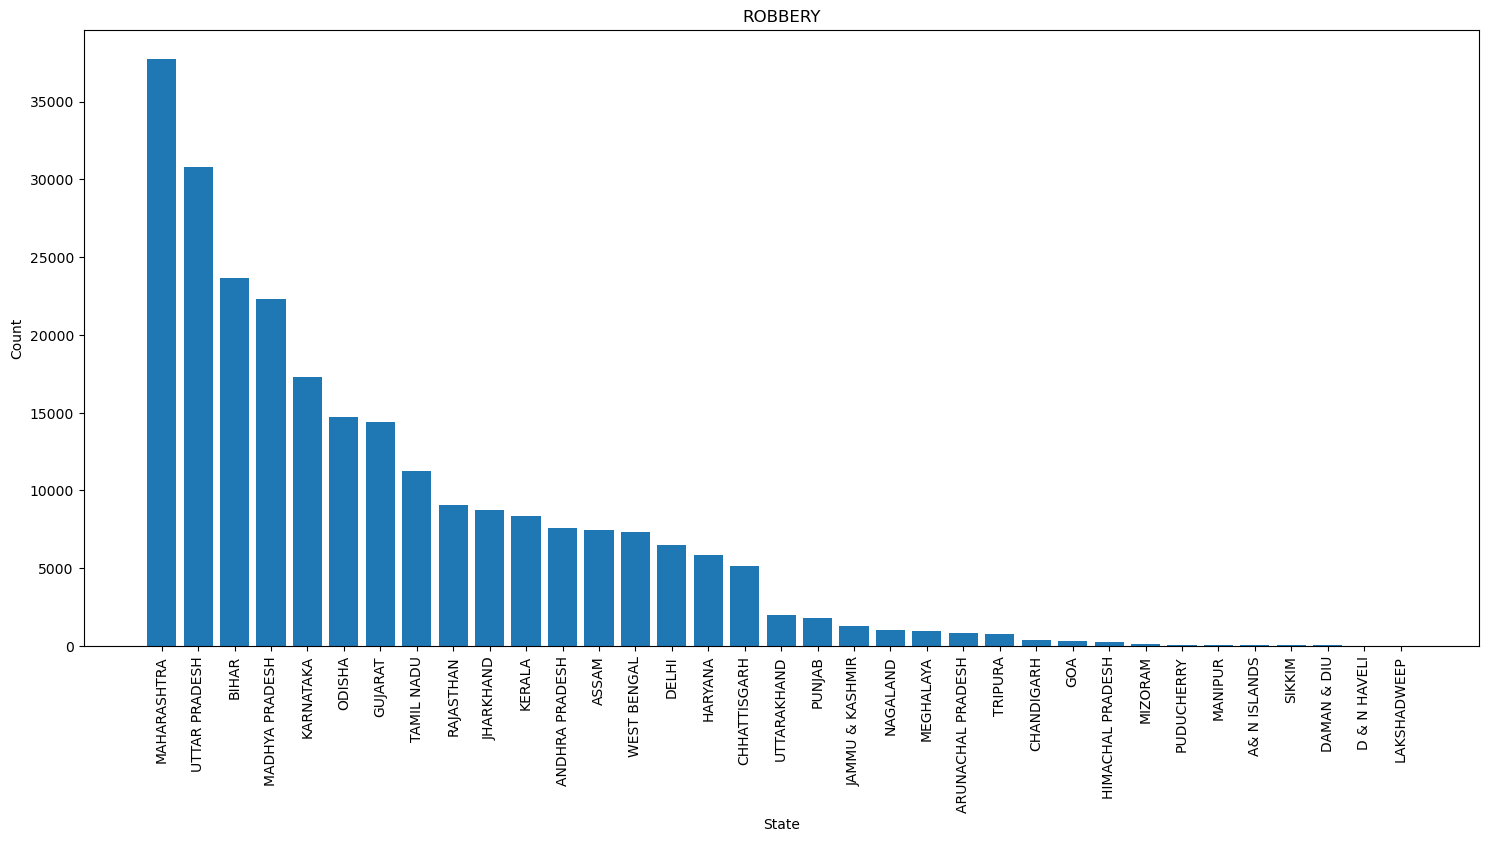

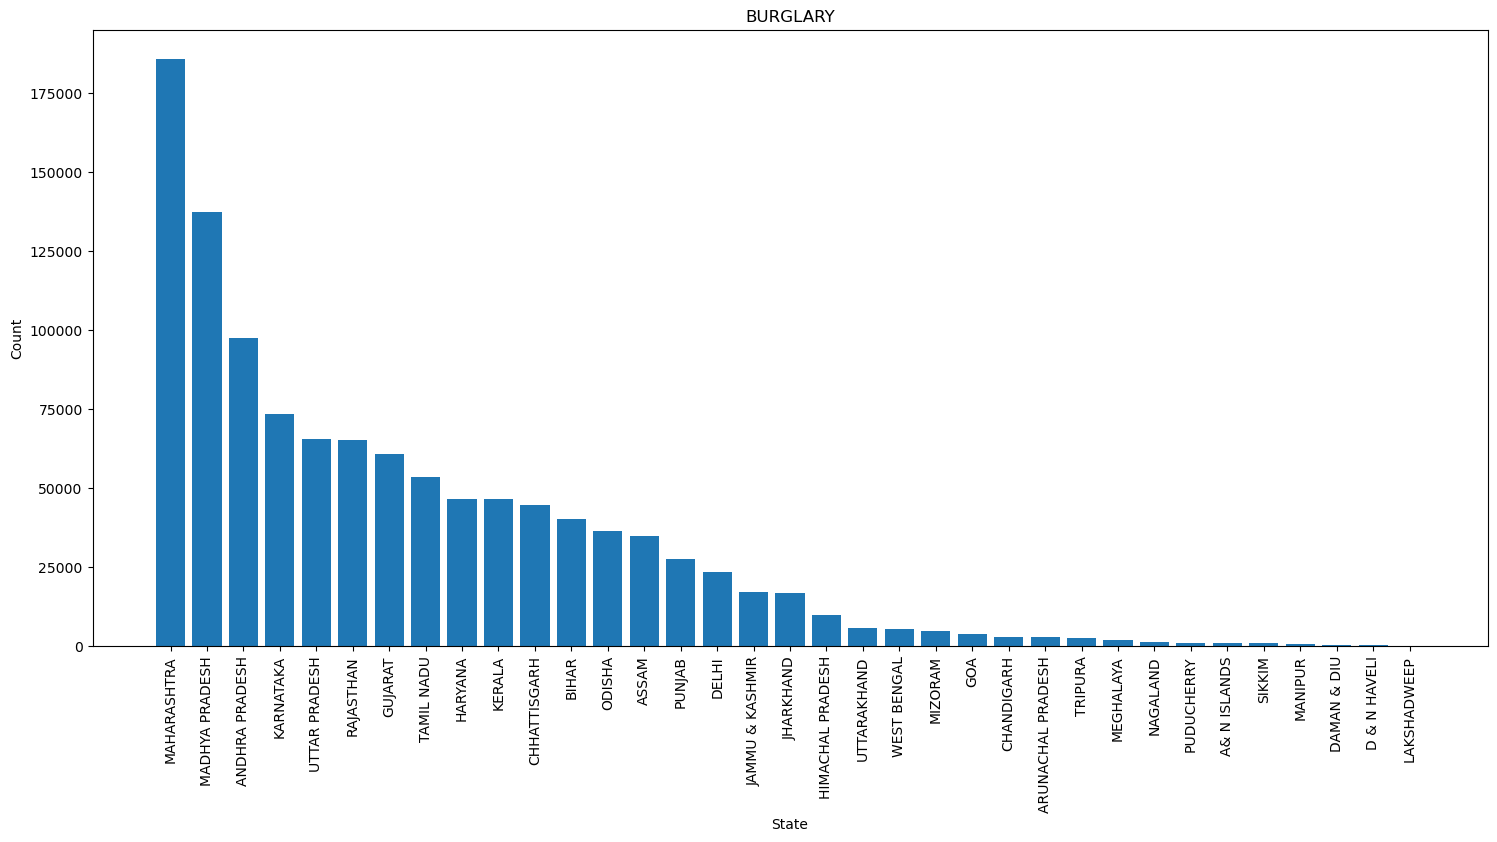

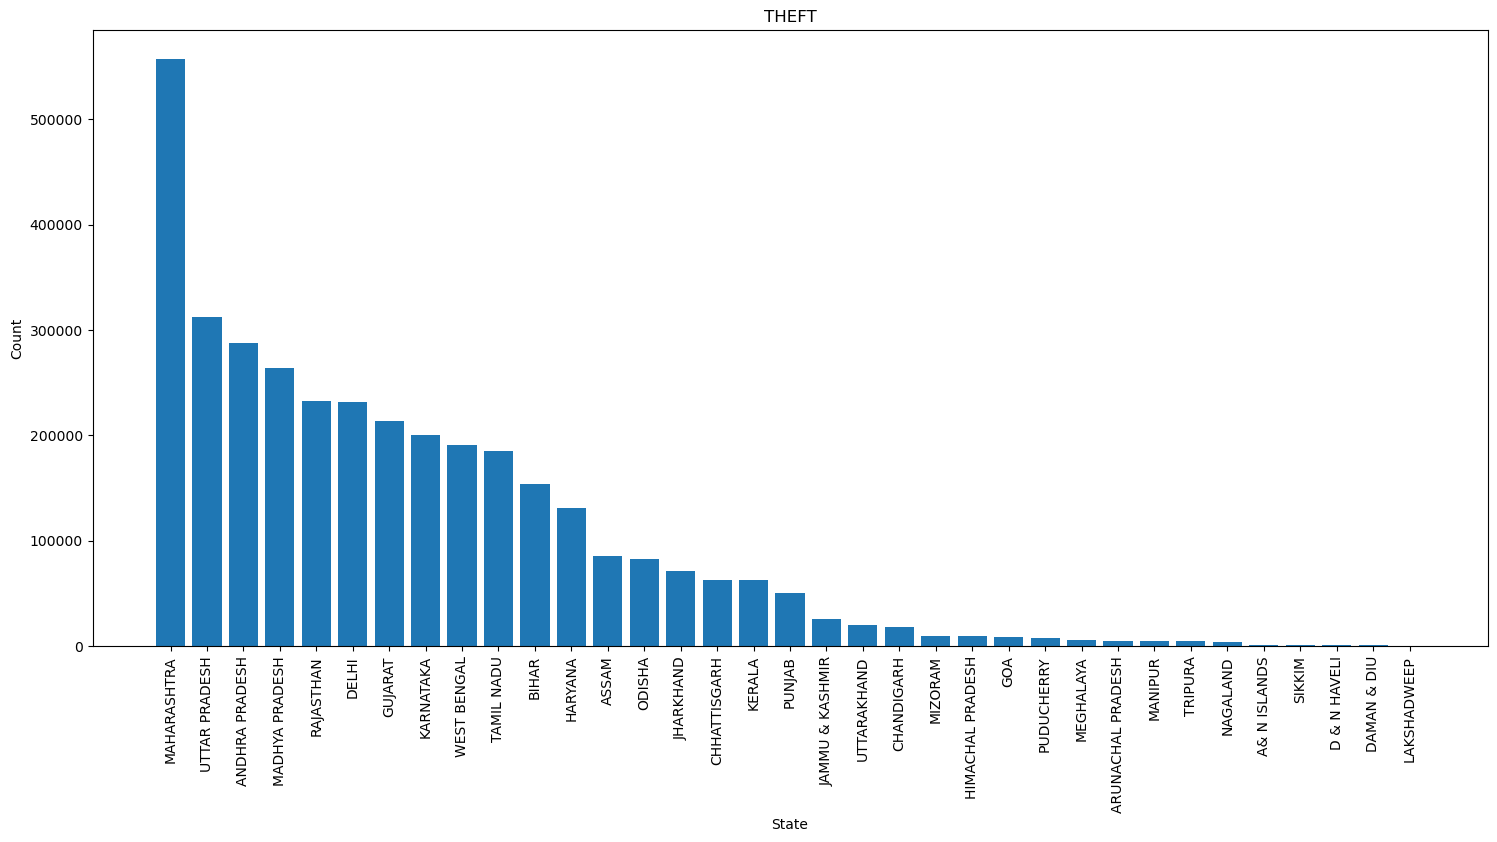

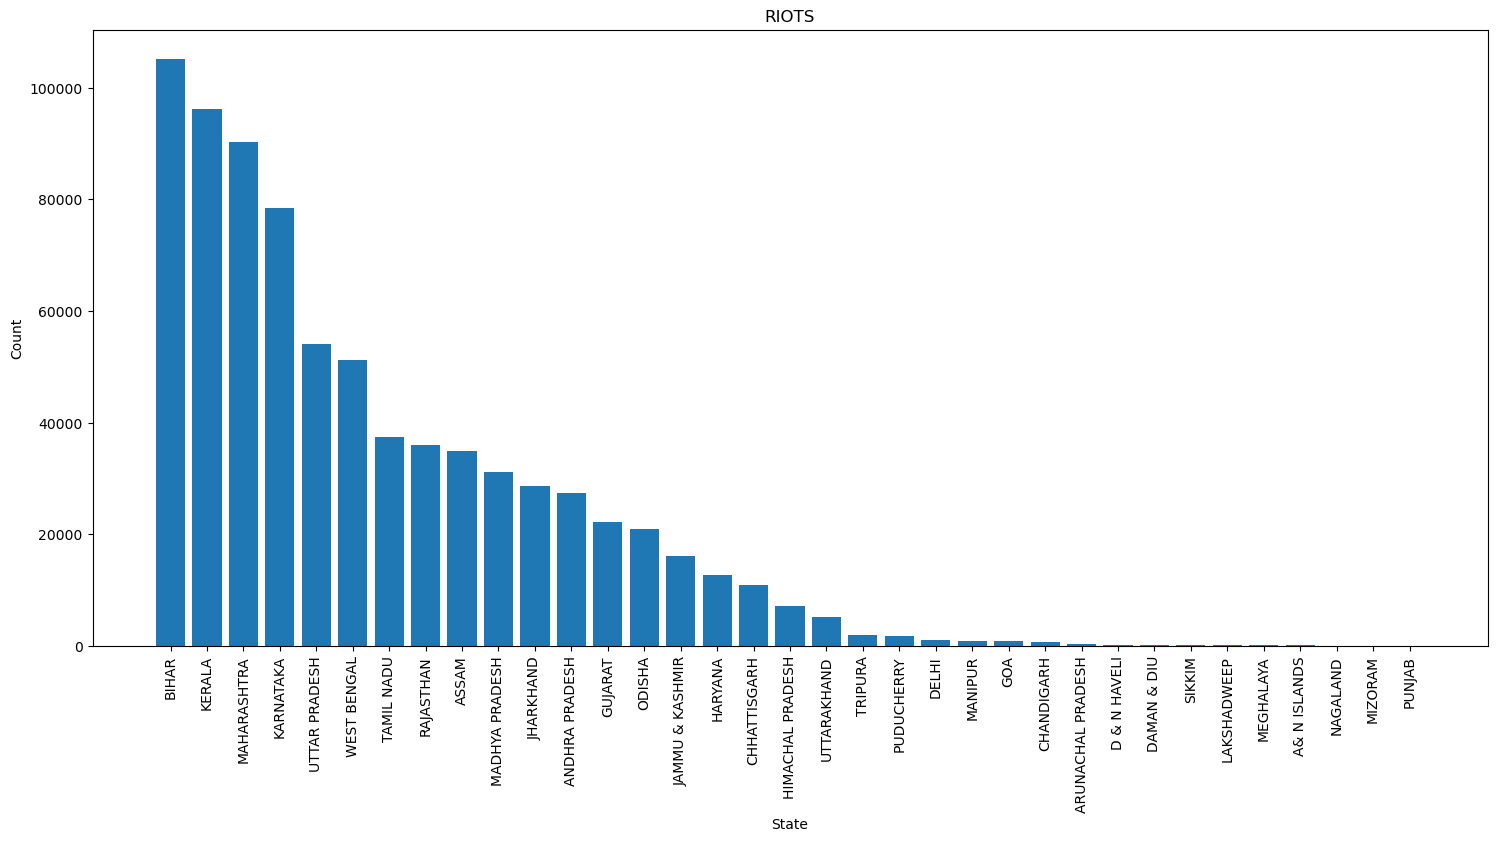

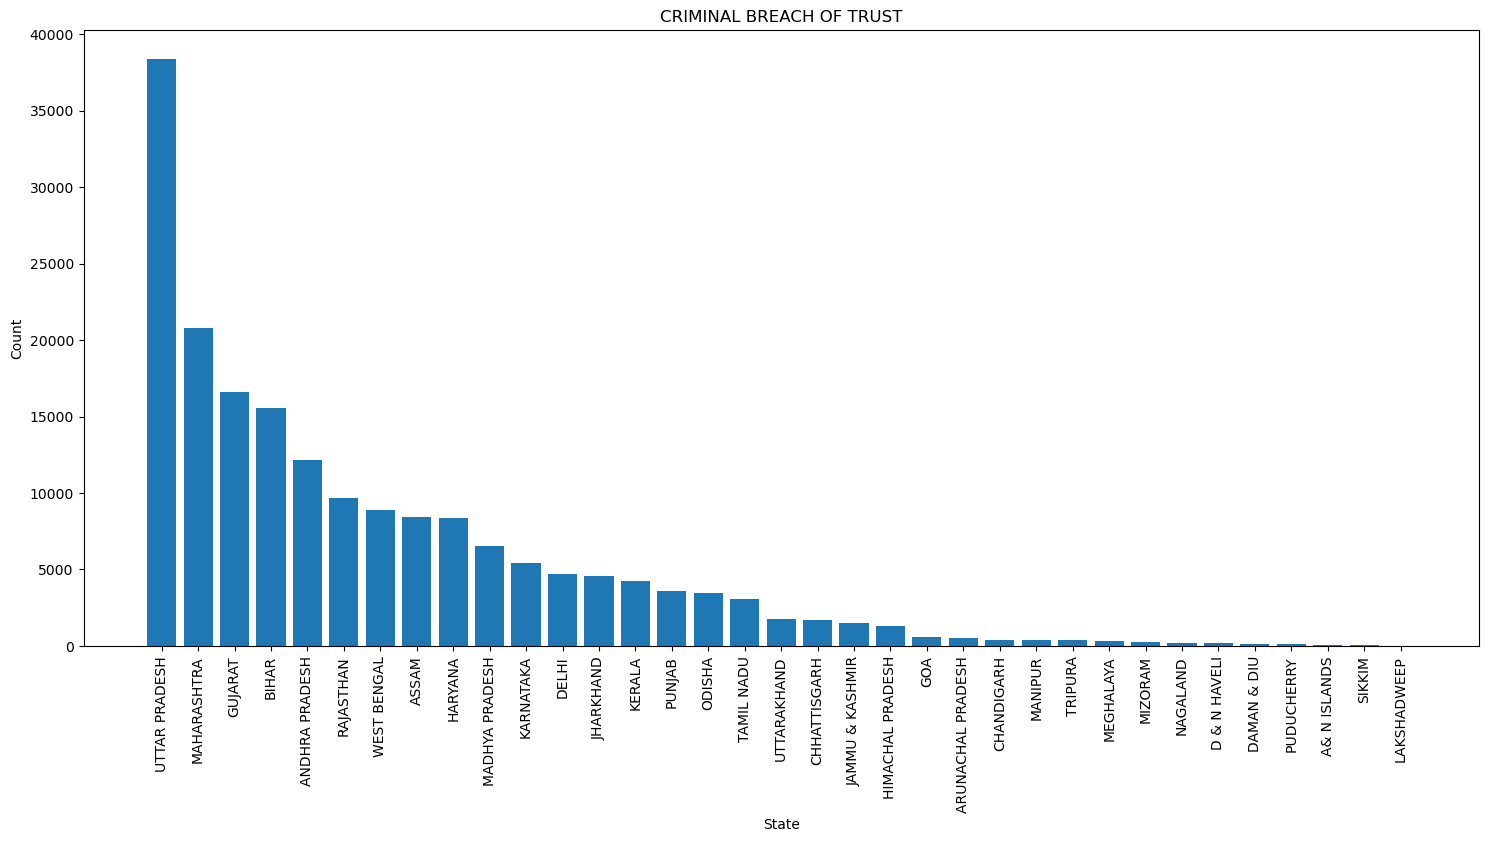

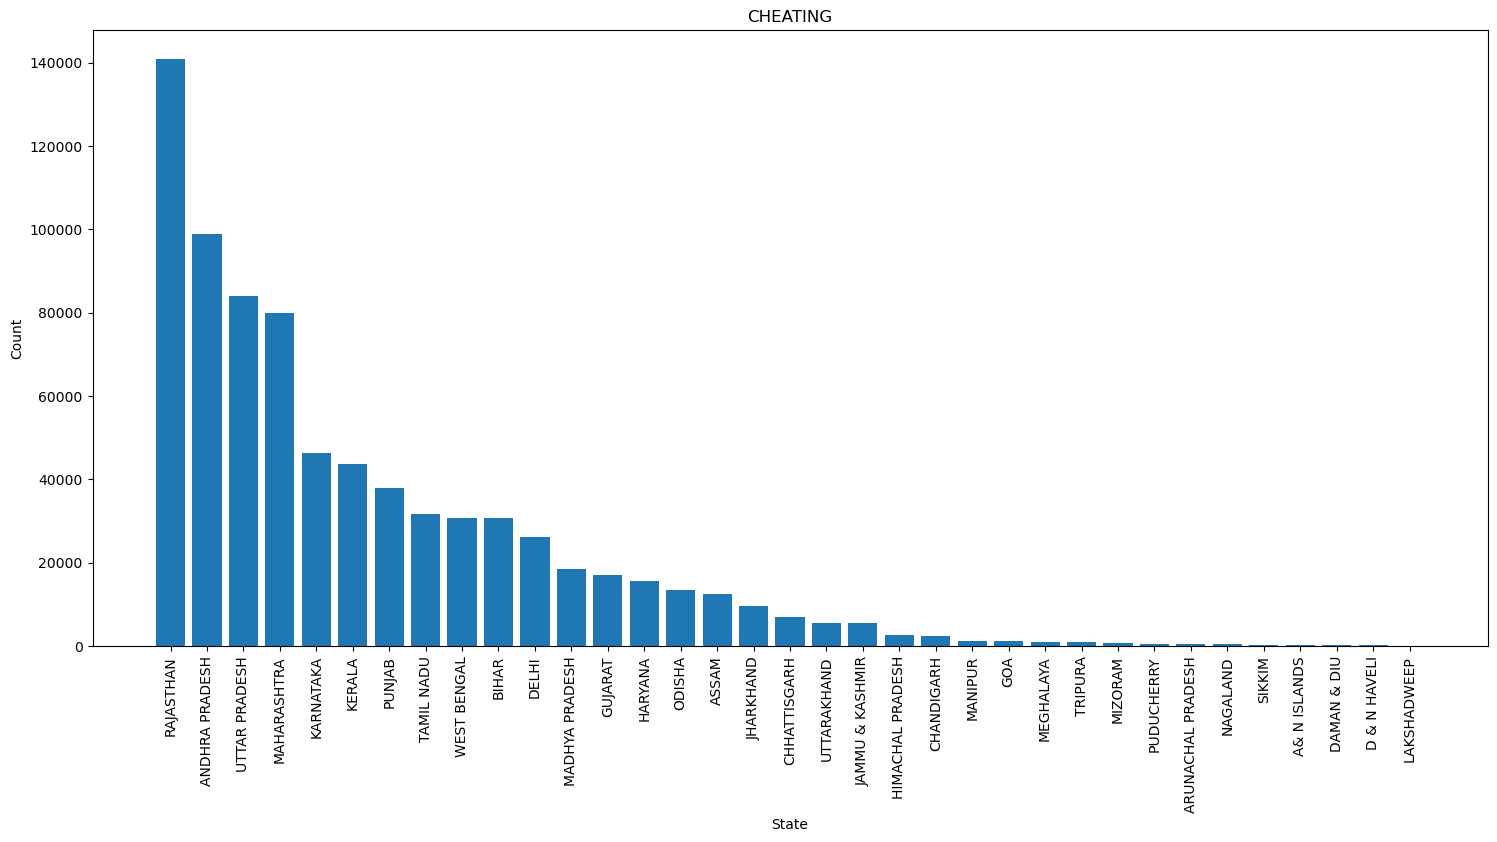

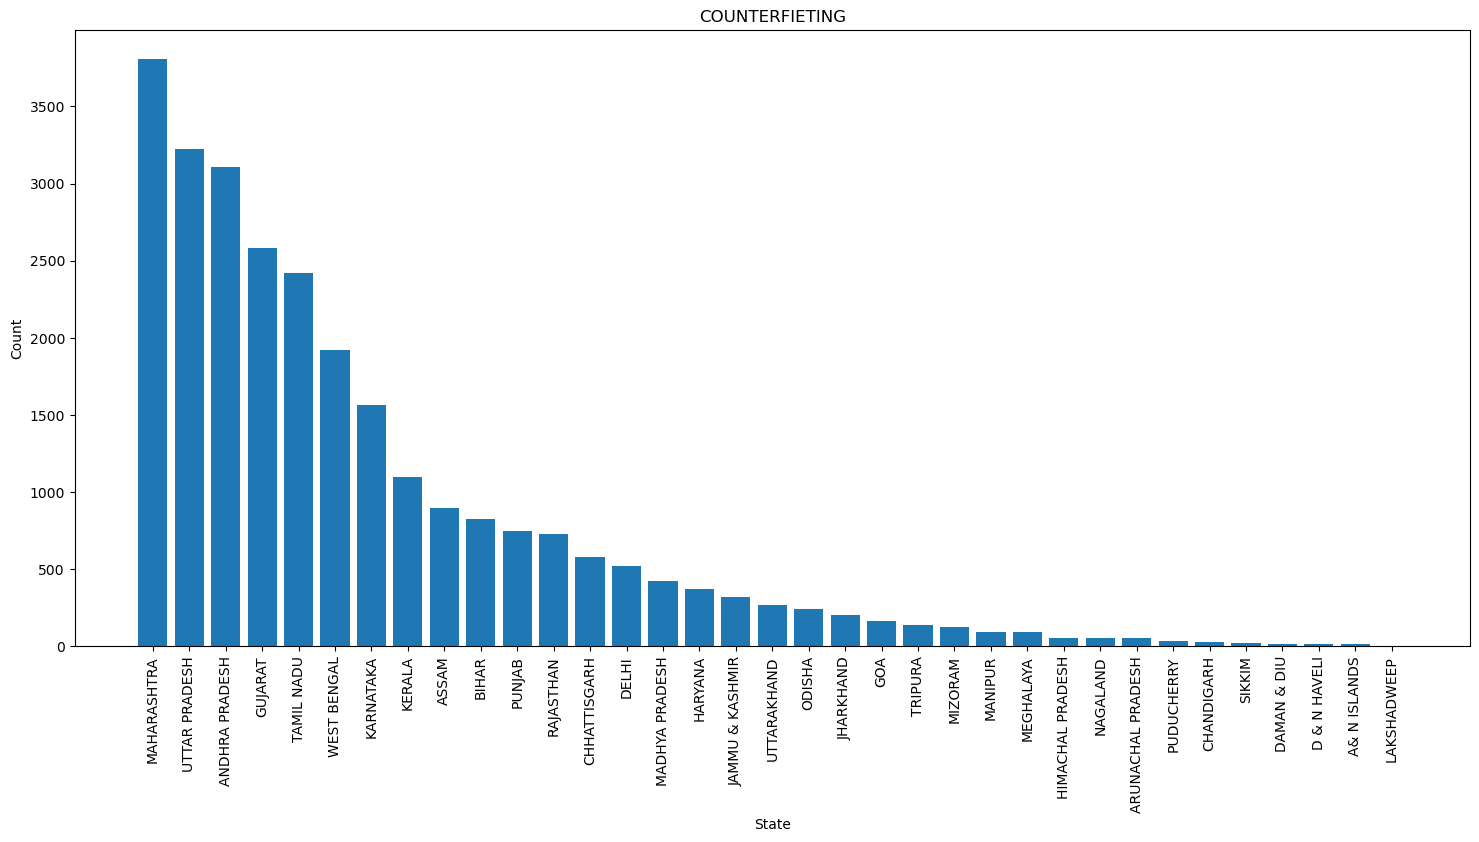

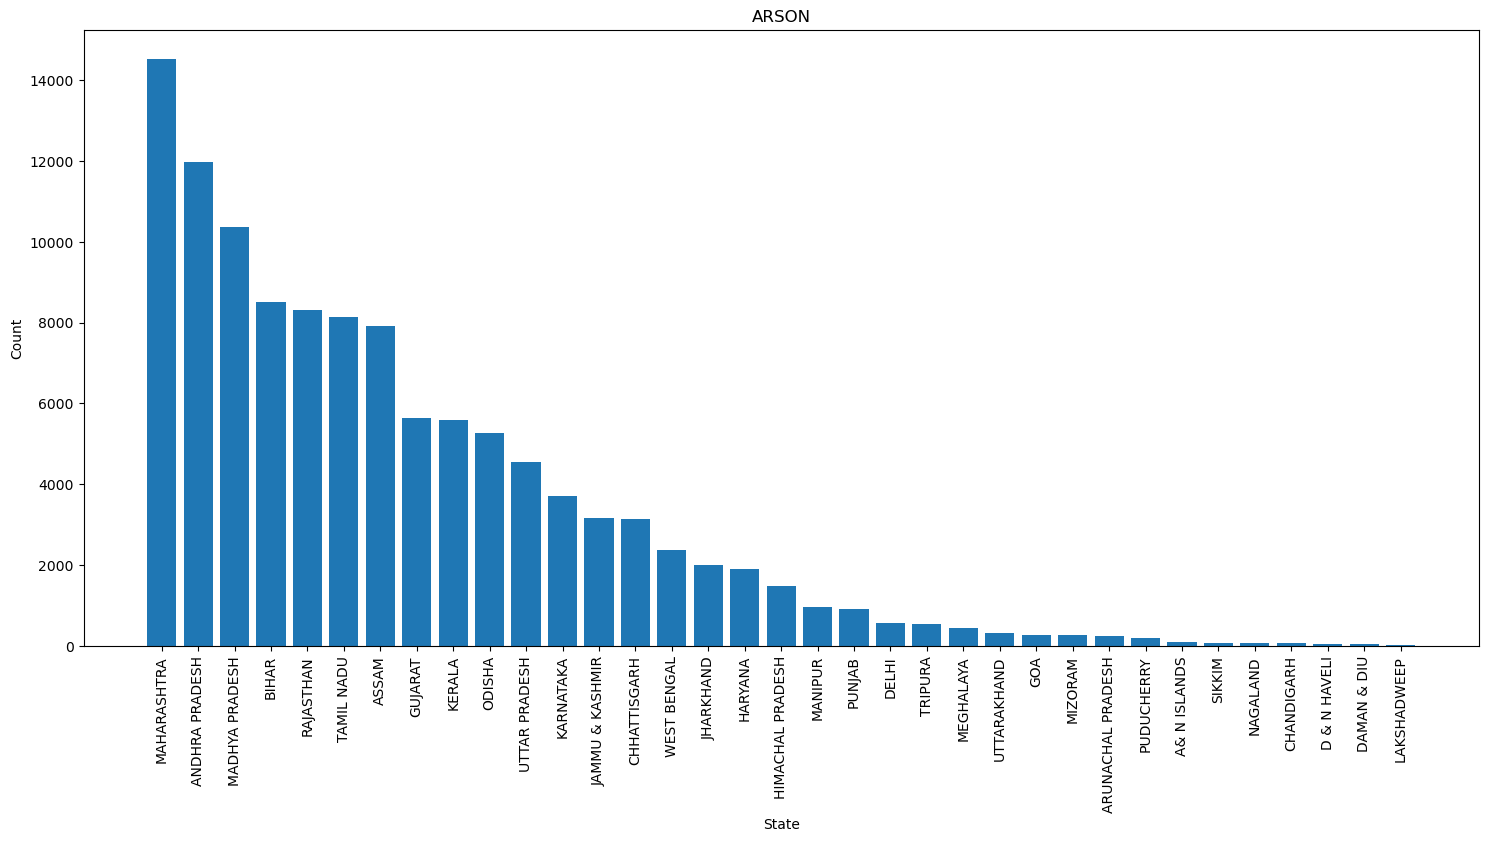

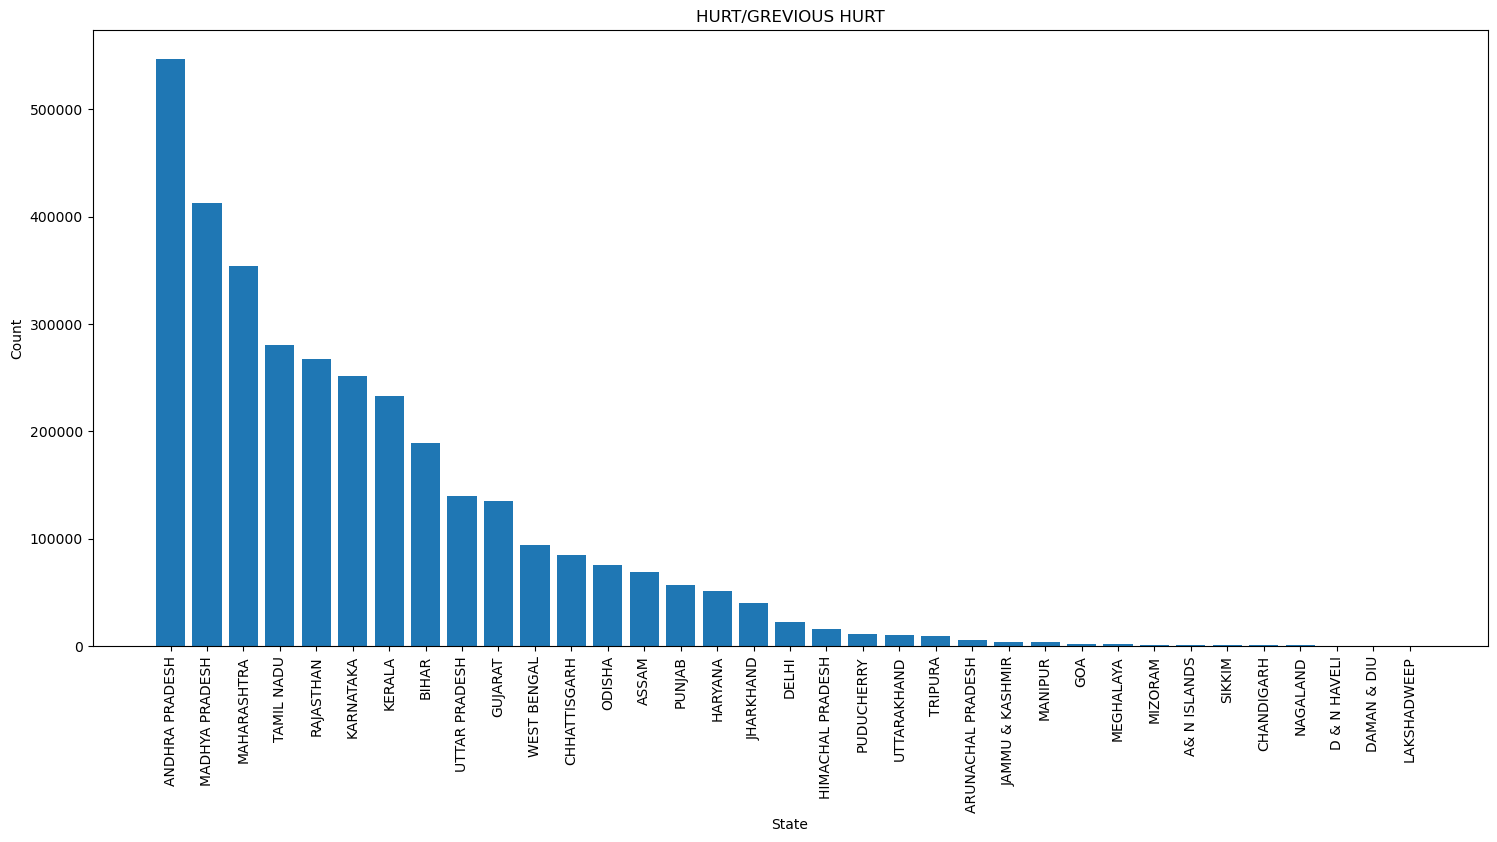

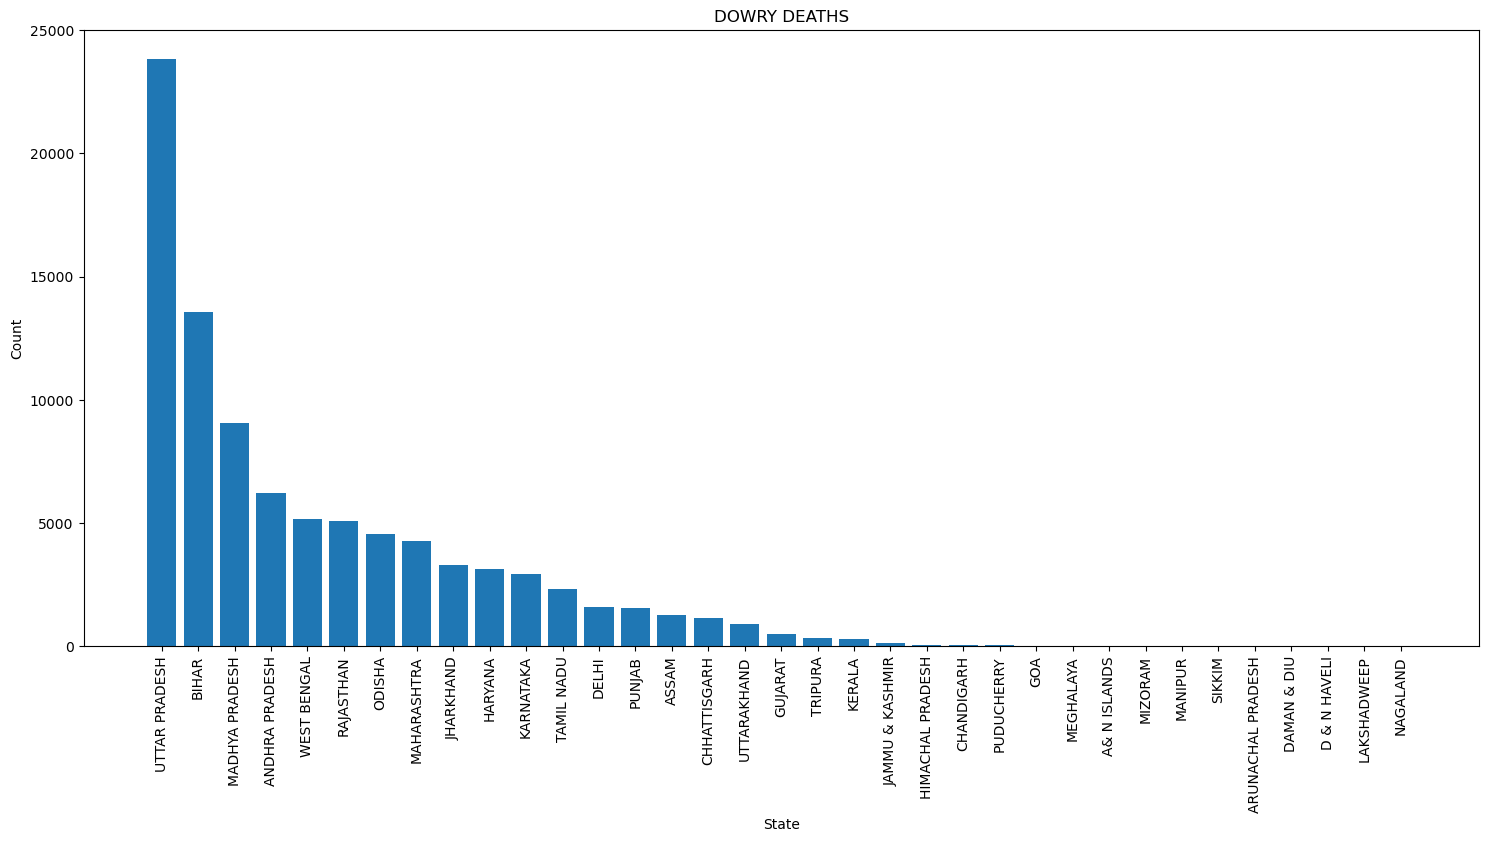

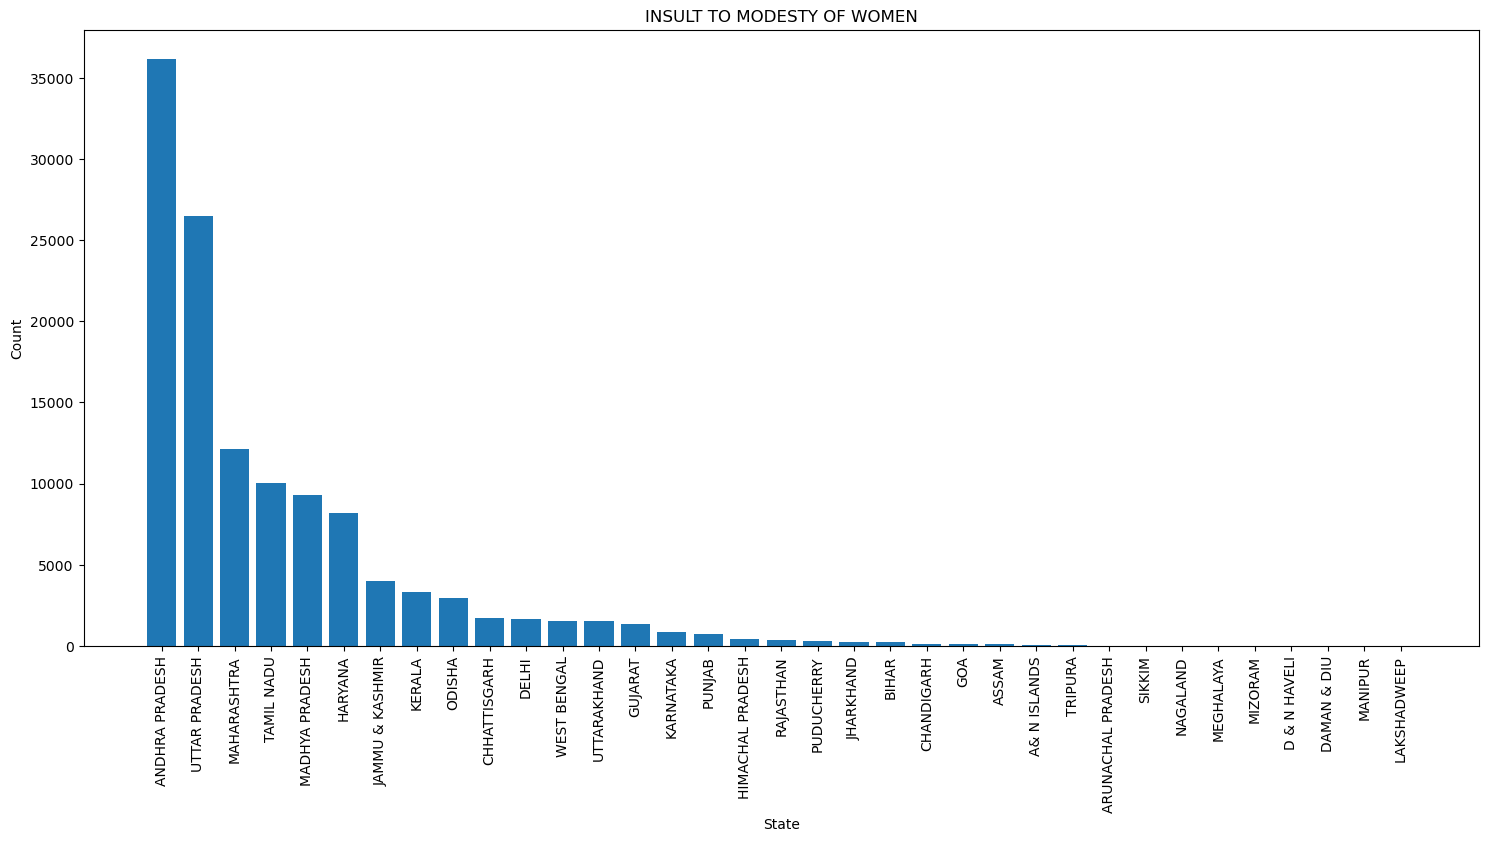

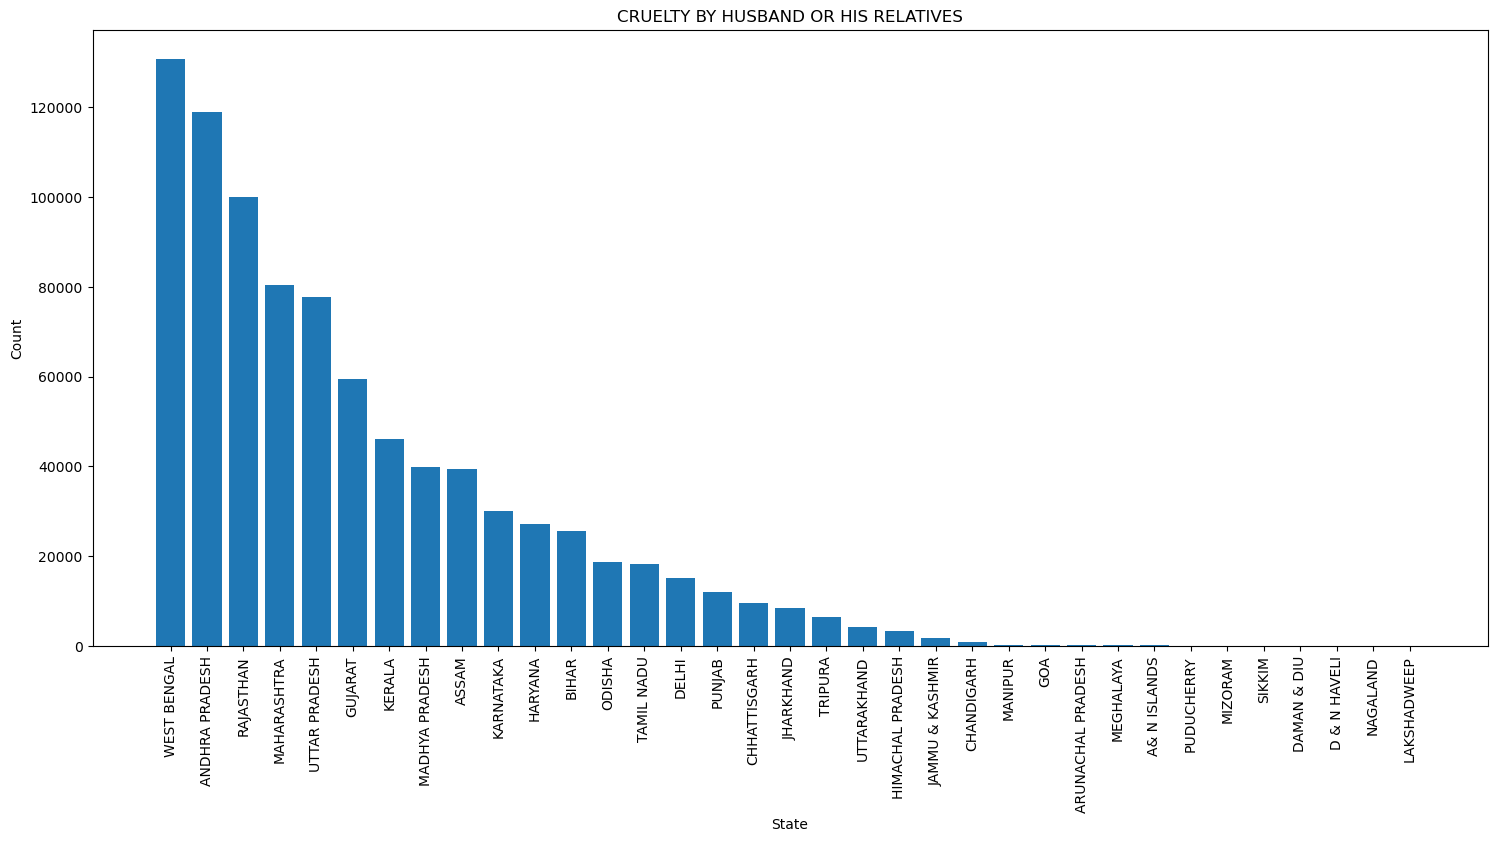

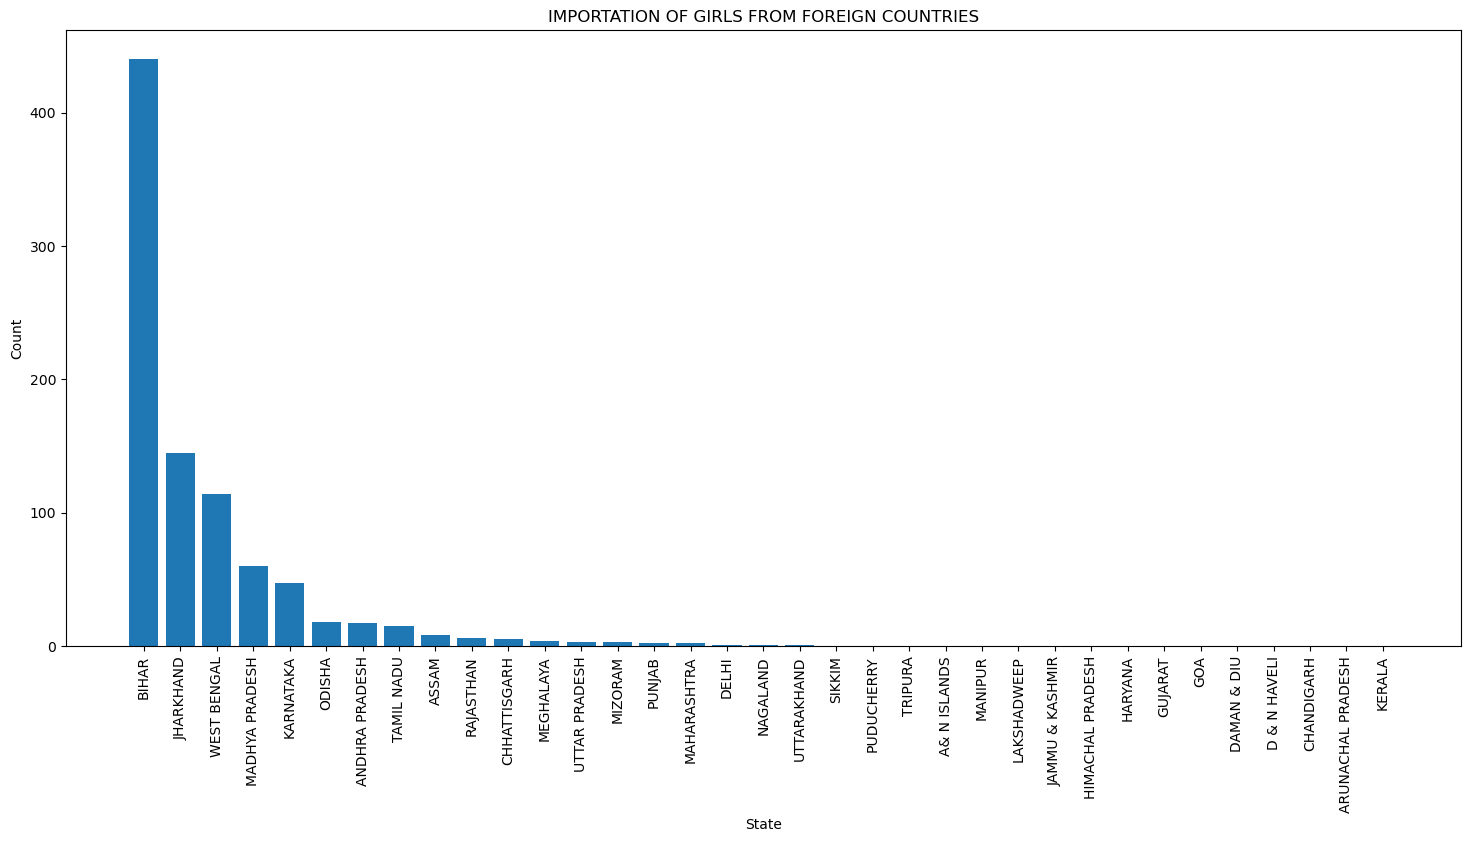

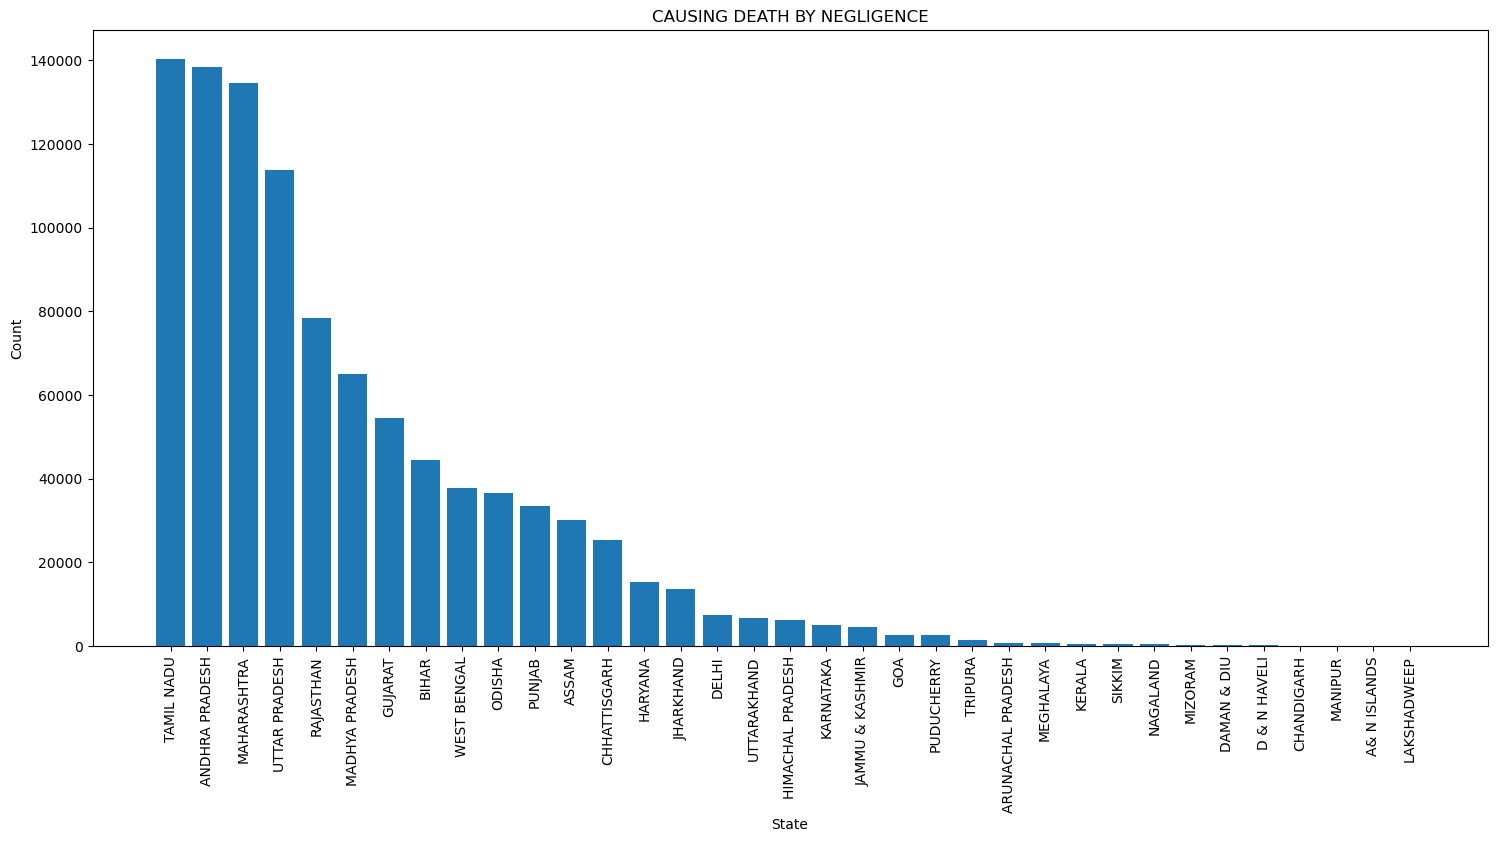

In [25]:
for i in crimes:
    crime = df.groupby("State/UT")[i].sum().sort_values(ascending=False)
    plt.figure(figsize = (18,8))
    plt.bar(crime.index, crime.values)
    plt.xticks(crime.index)
    plt.xticks(rotation = 90)
    plt.xlabel("State")
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

 Madhya Pradesh records the highest cases of 'Assault on women with intent to outrage her modesty.

Uttar Pradesh has the highest number of cases recorded of 'Kidnapping and Abduction'.,'MURDERS','CRIMINALS BREACH OF TRUST',DOWRY DEATHS

ROBBERY,THEFT,BURGLARY ,COUNTEREITING BELONGS TO MAHARASHTRA

DAIOTY, RIOTS,IMPORTATION OF GIRLS TO FOREIGN COUNTRIES MORE BELONGS TO BIHAR STATE

Cheating cases are more in RAJASTHAN

West Bengal records the highest cases of 'Cruelty by husband or his relatives'.

To conclude, crime against women in India is very high so we have to make appropriate measures against the criminals who exploits them 
to make this nation to become safe.